In [64]:
# import datasets
boston_listings = spark.read.format("csv")\
            .option("inferSchema", True)\
            .option("header", True)\
            .option("multiLine", True)\
            .load("file:///Users/Neeraj/Documents/Proj/Spark/data/airbnb/boston/listings.csv")
boston_listings.count()

3789

In [65]:
boston_listings.columns

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [67]:
boston_listings.select("id", "listing_url", "name", "price").show(10)

+--------+--------------------+--------------------+--------------------+
|      id|         listing_url|                name|               price|
+--------+--------------------+--------------------+--------------------+
|12147973|https://www.airbn...|Sunny Bungalow in...|""Free Parking on...|
| 3075044|https://www.airbn...|Charming room in ...|             Kitchen|
|    6976|https://www.airbn...|Mexican Folk Art ...|                null|
| 1436513|https://www.airbn...|Spacious Sunny Be...|             Kitchen|
| 7651065|https://www.airbn...| Come Home to Boston|                   t|
|12386020|https://www.airbn...|Private Bedroom +...|""Air Conditioning""|
| 5706985|https://www.airbn...|New Lrg Studio ap...|                 1.0|
| 2843445|https://www.airbn...|"""Tranquility"" ...|""Air Conditioning""|
|  753446|https://www.airbn...|6 miles away from...|              Cat(s)|
|  849408|https://www.airbn...|Perfect & Practic...|     Entire home/apt|
+--------+--------------------+-------

In [71]:
bs = boston_listings.withColumn("id_type", boston_listings.id.cast("int"))
bs.select("id_type").show()
bs = bs.na.drop(subset=["id_type"])
bs.count()

+--------+
| id_type|
+--------+
|12147973|
| 3075044|
|    6976|
| 1436513|
| 7651065|
|12386020|
| 5706985|
| 2843445|
|  753446|
|  849408|
|12023024|
| 1668313|
| 2684840|
|13547301|
| 5434353|
|  225979|
| 3420384|
|13512930|
| 7482195|
| 7252607|
+--------+
only showing top 20 rows



3585

In [61]:
bs.select("id", "listing_url", "name", "price").show(10)

+--------+--------------------+--------------------+--------------------+
|      id|         listing_url|                name|               price|
+--------+--------------------+--------------------+--------------------+
|12147973|https://www.airbn...|Sunny Bungalow in...|""Free Parking on...|
| 3075044|https://www.airbn...|Charming room in ...|             Kitchen|
|    6976|https://www.airbn...|Mexican Folk Art ...|                null|
| 1436513|https://www.airbn...|Spacious Sunny Be...|                null|
| 7651065|https://www.airbn...| Come Home to Boston|                null|
|12386020|https://www.airbn...|Private Bedroom +...|""Air Conditioning""|
| 5706985|https://www.airbn...|New Lrg Studio ap...|                null|
| 2843445|https://www.airbn...|"""Tranquility"" ...|                null|
|  753446|https://www.airbn...|6 miles away from...|              Cat(s)|
|  849408|https://www.airbn...|Perfect & Practic...|     Entire home/apt|
+--------+--------------------+-------

In [80]:
import pandas as pd
bl = pd.read_csv("file:///Users/Neeraj/Documents/Proj/Spark/data/airbnb/boston/listings.csv")
pd.set_option('max_columns', None)
bos_reviews=pd.read_csv("file:///Users/Neeraj/Documents/Proj/Spark/data/airbnb/boston/reviews.csv")
bos_calender=pd.read_csv("file:///Users/Neeraj/Documents/Proj/Spark/data/airbnb/boston/calendar.csv")



In [79]:
# data cleanup
bl.price.head(5)
bl.price = bl.price.str.replace('$','')
bl.price = bl.price.str.replace(',','').astype('float')
bl.price.head(5)

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [81]:
bos_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [27]:
bos_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [18]:
bos_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [82]:
bos_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [83]:
# convert date to datetime format
bos_reviews.date = pd.to_datetime(bos_reviews.date, format='%Y-%m-%d')
bos_reviews.info()
bos_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null datetime64[ns]
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.1+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [88]:
bos_listing.groupby(['room_type']).agg({'id':'count'}).head()

,id
room_type,
Entire home/apt,2127
Private room,1378
Shared room,80


In [89]:
bos_listing.groupby(['property_type', 'room_type']).agg({'id':'count'})

id
property_type   room_type            
Apartment       Entire home/apt  1764
                Private room      786
                Shared room        62
Bed & Breakfast Entire home/apt     2
                Private room       38
                Shared room         1
Boat            Entire home/apt    10
                Private room        2
Camper/RV       Entire home/apt     1
Condominium     Entire home/apt   150
                Private room       79
                Shared room         2
Dorm            Private room        2
Entire Floor    Entire home/apt     2
                Private room        2
Guesthouse      Entire home/apt     1
House           Entire home/apt   148
                Private room      405
                Shared room         9
Loft            Entire home/apt    29
                Private room        8
                Shared room         2
Other           Entire home/apt     2
                Private room       11
                Shared room         4
Townhouse       Entire home/apt    14
                Private room       40
Villa           Entire home/apt     2
                Private room        4

In [90]:
bos_calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [97]:
# find how many days each listing was unavailable
import numpy as np
bos_calender['available'].value_counts()

bos_calender['unavailable'] = np.where(bos_calender['available'] == "f", 1, 0)

bos_unavail = bos_calender.groupby(['listing_id']).agg({'unavailable':'sum', 'available':'count'})
bos_unavail.rename(index=str, columns={"unavailable": "total_days_unavailable", \
                                       "available": "total_days_available"}, inplace=True)

bos_unavail['unavail_percentage'] = round(bos_unavail['total_days_unavailable']/bos_unavail['total_days_available'] * 100, 2)
bos_unavail.head()



,total_days_unavailable,total_days_available,unavail_percentage
listing_id,,,
3353,116,365,31.78
5506,21,365,5.75
6695,41,365,11.23
6976,46,365,12.60
8792,117,365,32.05


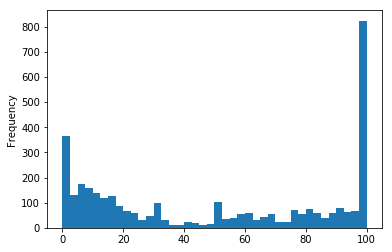

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
bos_unavail.unavail_percentage.plot(kind='hist', bins=40)

In [11]:
bosDF = spark.createDataFrame(bos_listing)
bosDF.show(3)

TypeError: field notes: Can not merge type <class 'pyspark.sql.types.DoubleType'> and <class 'pyspark.sql.types.StringType'>